# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing & Incpecting Data

In [2]:
data = pd.read_excel("/content/startup-expansion.xlsx")

In [3]:
data

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [5]:
data[["Marketing Spend","Revenue"]].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


# Data Preprocessing

In [6]:
data['City'].nunique()

149

In [7]:
data['City'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [8]:
data['City'].value_counts()

,count
City,
Rochester,2
Killeen,1
Wichita Falls,1
Naperville,1
Clovis,1
...,...
Akron,1
Fullerton,1
Manchester,1


In [9]:
data['State'].value_counts()

,count
State,
California,40
Texas,17
Florida,12
Washington,7
Colorado,5
Illinois,5
Georgia,4
Alabama,4
Connecticut,4


In [10]:
data['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [11]:
data['State'].nunique()

35

In [12]:
data['Sales Region'].nunique()

2

In [13]:
data['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [14]:
data['Sales Region'].value_counts()

,count
Sales Region,
Region 2,86
Region 1,64


In [15]:
data['New Expansion'].unique()

array(['Old', 'New'], dtype=object)

In [16]:
data['New Expansion'].nunique()

2

In [17]:
data['New Expansion'].value_counts()

,count
New Expansion,
Old,140
New,10


In [18]:
data.isnull().sum()

,0
Store ID,0
City,0
State,0
Sales Region,0
New Expansion,0
Marketing Spend,0
Revenue,0


In [19]:
data.duplicated().sum()

0

# Data Analysis

In [20]:
data.sample(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
85,86,Gresham,Oregon,Region 2,Old,2745,19708
53,54,Everett,Washington,Region 2,Old,3129,15562
126,127,Cedar Rapids,Iowa,Region 1,Old,2553,52072
86,87,Amarillo,Texas,Region 2,Old,3984,56089
3,4,Denton,Texas,Region 2,Old,2759,38284
111,112,West Palm Beach,Florida,Region 1,Old,2926,18089
99,100,Billings,Montana,Region 1,Old,3015,20541
0,1,Peoria,Arizona,Region 2,Old,2601,48610
19,20,Broken Arrow,Oklahoma,Region 2,Old,2765,19120
132,133,Des Moines,Iowa,Region 1,Old,2995,57432


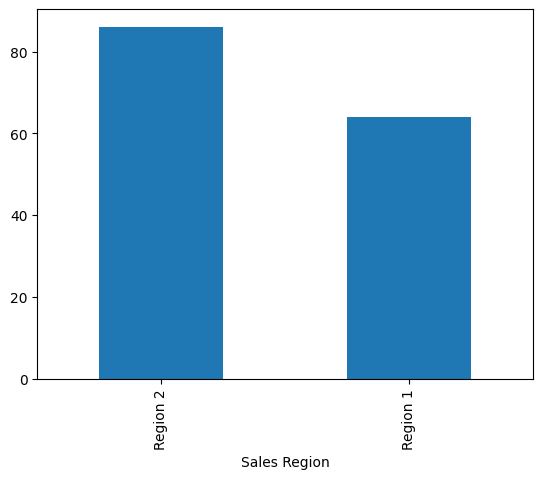

In [21]:
data['Sales Region'].value_counts().plot.bar()
plt.show()

In [22]:
data.groupby('Store ID')['Revenue'].sum().sort_values(ascending=False).head(10)

,Revenue
Store ID,
64,68828
32,65475
10,64906
38,64302
147,63148
18,63027
140,62337
7,60338
5,59887


In [23]:
data[data['New Expansion'] == "Old"]

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
135,136,San Mateo,California,Region 2,Old,1811,19426
136,137,Warren,Michigan,Region 1,Old,2736,47262
137,138,Norwalk,California,Region 2,Old,3112,19703
138,139,Lafayette,Louisiana,Region 1,Old,2603,40255


In [24]:
data[data['New Expansion'] == "New"]

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
140,141,Chattanooga,Tennessee,Region 2,New,3587,55357
141,142,Tempe,Arizona,Region 2,New,2911,48954
142,143,Joliet,Illinois,Region 1,New,3279,48315
143,144,Rancho Cucamonga,California,Region 2,New,2945,52366
144,145,Glendale,California,Region 2,New,2363,49376
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457
149,150,Thousand Oaks,California,Region 2,New,2431,40141


In [25]:
data['Revenue'].groupby(data['Sales Region']).sum()

,Revenue
Sales Region,
Region 1,2596301
Region 2,3298914


In [26]:
data[data['New Expansion'] == "Old"].groupby('City').max()['Revenue'].nlargest(10)

,Revenue
City,
Little Rock,68828
Grand Rapids,65475
Rochester,64906
Oxnard,64302
Fontana,63027
Providence,62337
Birmingham,60338
Overland Park,59887
San Bernardino,59870


In [27]:
data[data['New Expansion'] == "New"].groupby('City').max()['Revenue'].nlargest(10)

,Revenue
City,
Brownsville,63148
Chattanooga,55357
Rancho Cucamonga,52366
Glendale,49376
Tempe,48954
Joliet,48315
Rockford,43377
Thousand Oaks,40141
Paterson,34603


In [28]:
data.groupby(['State','City','New Expansion']).sum()['Revenue'].nlargest(10)

,,,Revenue
State,City,New Expansion,
Arkansas,Little Rock,Old,68828
Michigan,Grand Rapids,Old,65475
New York,Rochester,Old,64906
California,Oxnard,Old,64302
Texas,Brownsville,New,63148
California,Fontana,Old,63027
Rhode Island,Providence,Old,62337
Alabama,Birmingham,Old,60338
Kansas,Overland Park,Old,59887


In [29]:
data['Profit'] = data['Revenue'] - data['Marketing Spend']

In [30]:
data

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018
...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729
148,149,College Station,Texas,Region 2,New,2994,22457,19463


In [31]:
data['ROMS'] = round(data['Profit']/data['Marketing Spend'] * 100 ,2)

In [32]:
data

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38
...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07


In [33]:
data['ROMS %'] =round((data['ROMS'] / 100) ,2)

In [34]:
data

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS %
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.69
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.75
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.90
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.88
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.87
...,...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23,14.37
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.18
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10,15.38
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07,6.50


In [35]:
data.to_csv('New Expansion.csv')